<h1><center>Natural Computing, Experimenting with Genetic Programming</center></h1>
<center>Frederik Kelbel, s1653529</center>

## Set-up

I decided against seeding since the results could heavily depend on a good seed, depending on the parameters. It also has negative repurcussions on diversity, if the seed is kept the same during the evolution process. One could make the seed an inheritable trait/gene. The experiments do not cover this.

In [1]:
from Callables import find_prime_polynomial
from Chromosomes import Fitness, Poly_Chrom
from Population import Poly_Population, Tree_Population
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def show_final_polynomials(pop, test_interval):
    print("Surviving polynomial: ")
    p = pop.polynomials[0]
    print(p.print_gp_polynomial())
    print("On test interval {0} the polynomial produced {1} primes. \nIt had a maximum of {2} "
          "consecutive primes on the test interval. \nStarting at {3}, it had {4} consecutive primes. "
          "\nIts fitness score is {5}.\n"
          .format(test_interval, p.num_primes_fitness_in_interval(test_interval),
                  p.num_consecutive_primes_fitness_in_interval(test_interval),
                  test_interval[0],
                  p.num_consecutive_primes_fitness(test_interval),
                  p.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                                           Fitness.number_of_primes_in_interval,
                                                           Fitness.number_of_consecutive_primes])))

def show_average_fitness(pop):
    fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(211)
    ax.set_ylabel('Fitness')
    ax.set_xlabel('Generations')
    ax.set_title('Average Fitness')
    ax.plot(range(len(pop.average_fitness_over_time)), pop.average_fitness_over_time)
    plt.show()
    
def show_average_fitness_comparison(pops):
    fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(211)
    ax.set_ylabel('Fitness')
    ax.set_xlabel('Generations')
    ax.set_title('Average Fitness')
    for pop in pops:
        ax.plot(range(len(pop.average_fitness_over_time)), pop.average_fitness_over_time)
    plt.show()
    
def show_scatter_fitness(pop):
    fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)
    ax.set_ylabel('Fitness')
    ax.set_xlabel('Generations')
    ax.set_title('Fitness')
    for i in range(len(pop.fitness_over_time)):
        plt.scatter(np.tile([i], len(pop.fitness_over_time[i])), pop.fitness_over_time[i], s=0.8)
    plt.show()
    
def show_scatter_fitness_comparison(pops):
    num_plots = len(pops)
    fig, axs = plt.subplots(num_plots, figsize=(8, 10))
    fig.suptitle('Fitness comparison')
    for k in range(num_plots):
            for i in range(len(pops[k].fitness_over_time)):
                axs[k].set_ylabel('Fitness')
                axs[k].set_xlabel('Generations')
                axs[k].scatter(np.tile([i], len(pops[k].fitness_over_time[i])), pops[k].fitness_over_time[i], s=0.8)
    plt.show()

## Poly-Population

<h3>Baseline</h3>
This serves as a reference for comparisons and reproduction.

In [21]:
test_interval=(0, 300)
baseline1 = Poly_Chrom(np.array([17, 1, 1]))
baseline2 = Poly_Chrom(np.array([41, 1, 1]))
print("x^2 + x^1 + 17: ")
print("On test interval {0} the first baseline produced {1} primes. \nIt had a maximum of {2} "
      "consecutive primes on the test interval. \nStarting at {3}, it had {4} consecutive primes. "
      "\nIts fitness score is {5}.\n"
      .format(test_interval, baseline1.num_primes_fitness_in_interval(test_interval),
              baseline1.num_consecutive_primes_fitness_in_interval(test_interval),
              test_interval[0],
              baseline1.num_consecutive_primes_fitness(test_interval),
              baseline1.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                        Fitness.number_of_primes_in_interval,
                                        Fitness.number_of_consecutive_primes])))
print("x^2 + x^1 + 41: ")
print("On test interval {0} the second baseline produced {1} primes. \nIt had a maximum of {2} "
      "consecutive primes on the test interval. \nStarting at {3}, it had {4} consecutive primes. "
      "\nIts fitness score is {5}.\n"
      .format(test_interval, baseline2.num_primes_fitness_in_interval(test_interval),
              baseline2.num_consecutive_primes_fitness_in_interval(test_interval),
              test_interval[0],
              baseline2.num_consecutive_primes_fitness(test_interval),
              baseline2.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                        Fitness.number_of_primes_in_interval,
                                        Fitness.number_of_consecutive_primes])))

x^2 + x^1 + 17: 
On test interval (0, 300) the first baseline produced 139 primes. 
It had a maximum of 16 consecutive primes on the test interval. 
Starting at 0, it had 0 consecutive primes. 
Its fitness score is 155.

x^2 + x^1 + 41: 
On test interval (0, 300) the second baseline produced 211 primes. 
It had a maximum of 40 consecutive primes on the test interval. 
Starting at 0, it had 0 consecutive primes. 
Its fitness score is 251.



<h3>Attempt to reproduce the second baseline. Establishing baseline parameters.</h3>

Chromosome: Poly_Population, Amount of populations: 1, Population-size: 1000, 
Test-interval: (0, 300), Birth-rate: 0.7, Mutation-rate: 0.15, Coeffs-bound: (1, 42), Constraint: 2


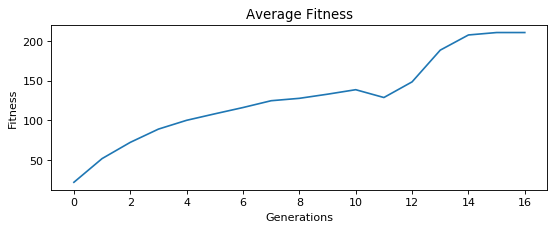

Surviving polynomial: 
(1)x^2 + (1)x^1 + (41)
On test interval (0, 300) the polynomial produced 211 primes. 
It had a maximum of 40 consecutive primes on the test interval. 
Starting at 0, it had 0 consecutive primes. 
Its fitness score is 251.



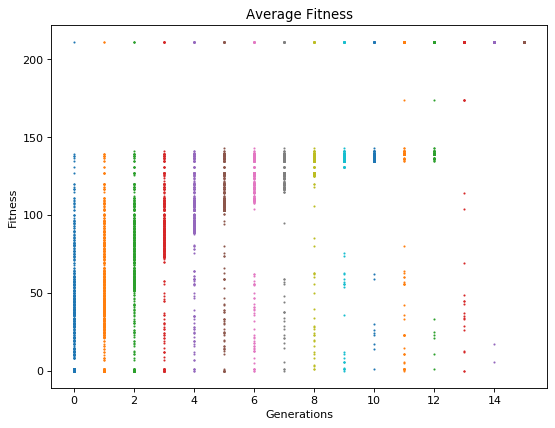

In [4]:
num_populations=1
merge_point=0.3
population_size=1000
test_interval=(0, 300)
birth_rate=0.7
mutation=0.15
coeffs_bound = (1, 42)
constraint = 2
poly_pop_order_2 = find_prime_polynomial(Poly_Population, 
                                   [Fitness.number_of_primes_in_interval],
                                   num_populations=num_populations, merge_point=merge_point, 
                                   population_size=population_size, 
                                   test_interval=test_interval, birth_rate=birth_rate, 
                                   mutation=mutation, coeffs_bound=coeffs_bound,
                                        constraint=constraint)
show_average_fitness(poly_pop_order_2)
show_final_polynomials(poly_pop_order_2, test_interval)
show_scatter_fitness(poly_pop_order_2)

<h3>Can we do better? Experimenting with parameter manipulations.</h3>

<h4>Increasing the order of the polynomials.</h4>

Chromosome: Poly_Population, Amount of populations: 1, Population-size: 1000, 
Test-interval: (0, 300), Birth-rate: 0.7, Mutation-rate: 0.15, Coeffs-bound: (1, 42), Constraint: 3
Surviving polynomial: 
(6)x^2 + (6)x^1 + (31)
On test interval (0, 300) the polynomial produced 190 primes. 
It had a maximum of 29 consecutive primes on the test interval. 
Starting at 0, it had 0 consecutive primes. 
Its fitness score is 219.

Chromosome: Poly_Population, Amount of populations: 1, Population-size: 1000, 
Test-interval: (0, 300), Birth-rate: 0.7, Mutation-rate: 0.15, Coeffs-bound: (1, 42), Constraint: 6
Surviving polynomial: 
(28)x^2 + (14)x^1 + (17)
On test interval (0, 300) the polynomial produced 152 primes. 
It had a maximum of 8 consecutive primes on the test interval. 
Starting at 0, it had 0 consecutive primes. 
Its fitness score is 160.



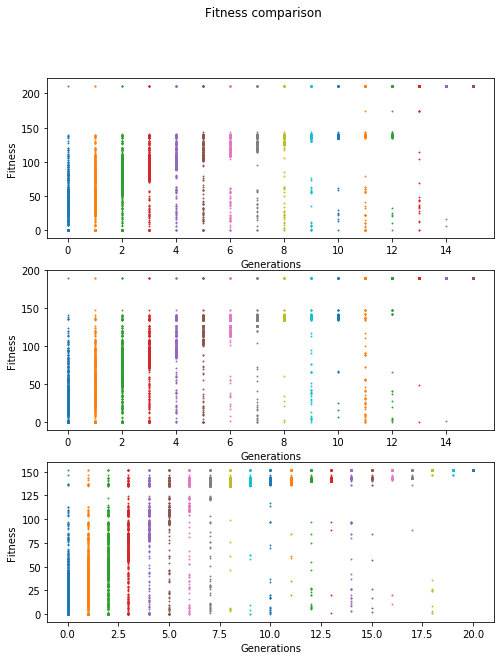

In [15]:
num_populations=1
merge_point=0.3
population_size=1000
test_interval=(0, 300)
birth_rate=0.7
mutation=0.15
coeffs_bound = (1, 42)
constraint = 3
poly_pop_order_3 = find_prime_polynomial(Poly_Population, 
                                [Fitness.number_of_primes_in_interval],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(poly_pop_order_3, test_interval)
constraint = 6
poly_pop_order_6 = find_prime_polynomial(Poly_Population, 
                                [Fitness.number_of_primes_in_interval],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(poly_pop_order_6, test_interval)
show_scatter_fitness_comparison([poly_pop_order_2, poly_pop_order_3, poly_pop_order_6])

Increasing the order reduced diversity, fitness and increased the convergence time.

## Tree-Population

In [ ]:
num_populations=1
merge_point=0.5
population_size=1000
target_population_size=5
test_interval=(0, 300)
birth_rate=0.85
mutation=0.01
coeffs_bound = (-50, 50)
constraint = 2
tree_population = find_prime_polynomial(Tree_Population, 
                                   [Fitness.number_of_primes_in_interval],
                                   num_populations=num_populations, merge_point=merge_point, 
                                   population_size=population_size, 
                                   target_population_size=target_population_size, 
                                   test_interval=test_interval, birth_rate=birth_rate, 
                                   mutation=mutation, coeffs_bound=coeffs_bound,
                                  constraint=constraint)
show_average_fitness(tree_population)
show_final_polynomials(tree_population, test_interval)
show_scatter_fitness(tree_population)

### Tree-Population, Experimenting with different functions